In [1]:
import numpy as np 
import pandas as pd 
import numpy as np 
import pandas as pd
import xarray as xr
import openpyxl
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import *
import matplotlib.colors as colors
from scipy import stats 
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
import matplotlib.cm as cm

In [2]:
iyr=2000
fyr=2023
domain='GRa'
domainO='MARMer'
variable='pr'
var='pr'
units='mm/month'
exp='obs'

model1='MAR'
res1='5x5km'

model2='chirps'
res2='0.05°x0.05°'

model3='cru'

model4='aphro'
res4=str('0.25°x0.25°')

model5='gpcp'
res5=str('1.0°x1.0°')
model6='era5-land'

model7='era5'




titles = {
    'MAM': 'MAM',
    'JJAS': 'JJAS',
    'ON': 'ON',
    'DJF': 'DJF',
}

station='MeraLa'


In [3]:
#####
## Opening station data + Deff Var 
#####
sourceData='/bettik/PROJECTS/pr-regional-climate/santolam/glacioclim/donnees_meteo/'
fileName='MeraLafinal2013_24.xlsx'
xl_file = pd.ExcelFile(sourceData+fileName)
dfs = {sheet_name: xl_file.parse(sheet_name) 
          for sheet_name in xl_file.sheet_names}
DataMeraLa=dfs['MeraLa2013_23']

NameVars=['Time','Tair','RH','u','Direction','SWin','SWout','LWin','LWout','Patm']
UnitVars=['data/hour','C','%','m/s','degrees','W/m2','W/m2','W/m2','W/m2','hPa']

##Define new DataFrame and changing name of columns
dfile = pd.DataFrame(data=DataMeraLa.loc[4:])
df=pd.DataFrame(dfile.values, columns=NameVars)

### Opening one column + converting into an array
Tair_ar=[float(i) for i in df.Tair.values]

def NewTime(df, NameVar, values, freq):
	time = pd.to_datetime(df['Time'].values)
	ds = xr.Dataset({NameVar: ("time", np.asarray(values))}, coords={"time": time})
	return ds
T=NewTime(df,'Tair',Tair_ar,'30min')

In [4]:
## GRID Model MAR
sourceDataGrid='/home/amoryc/'
#fileName_grF='NST.2000.01.01.00.GRa_Fedchenko.nc'
fileName_grM='NST.2000.01.01.00.GRa_Mera.nc_ICEmask'
ds_grM= xr.open_dataset(sourceDataGrid+fileName_grM)

In [5]:
sourceData1='/bettik/PROJECTS/pr-regional-climate/santolam/MARout/GRa/spin2/work/daily/'
sourceData2='/bettik/PROJECTS/pr-regional-climate/santolam/MARout/GRa/sensitivity_tests/'

In [6]:
####
## MAR SPIN2
####

variable='TTZ' ##RF;SF;SHSN3;TT
fileName1='TTZ_daymean_MARv3.14_ER5_spin2_GRa_2016.nc' ##change to monthly
dsM= xr.open_dataset(sourceData1+fileName1)['TTZ'][:,1,:,:] ## montlhy mean
FieldMAR1 = dsM.rename({'TIME': 'time'})
#FieldMAR1=FieldMAR1.sel(time='2016')


In [7]:
####
## MAR a30
####

variable='TTZ' ##RF;SF;SHSN3;TT
fileName2='TTZ_daymean_MARv3.14_ER5_sensitivity_tests_GRa_2016.a30.nc' ##change to monthly
dsM2= xr.open_dataset(sourceData2+fileName2)['TTZ'][:,1,:,:] ## montlhy mean
FieldMAR2 = dsM2.rename({'TIME': 'time'})

In [8]:
####
## MAR a31
####

variable='TTZ' ##RF;SF;SHSN3;TT
fileName3='TTZ_daymean_MARv3.14_ER5_sensitivity_tests_GRa_2016.a31.nc' ##change to monthly
dsM3= xr.open_dataset(sourceData2+fileName3)['TTZ'][:,1,:,:] ## montlhy mean
FieldMAR3 = dsM3.rename({'TIME': 'time'})

In [9]:
####
## MAR a32
####

variable='TTZ' ##RF;SF;SHSN3;TT
fileName4='TTZ_daymean_MARv3.14_ER5_sensitivity_tests_GRa_2016.a32.nc' ##change to monthly
dsM4= xr.open_dataset(sourceData2+fileName4)['TTZ'][:,1,:,:] ## montlhy mean
FieldMAR4 = dsM4.rename({'TIME': 'time'})


In [10]:
####
## MAR a33
####


variable='TTZ' ##RF;SF;SHSN3;TT
fileName5='TTZ_daymean_MARv3.14_ER5_sensitivity_tests_GRa_2016.a33.nc' ##change to monthly
dsM5= xr.open_dataset(sourceData2+fileName5)['TTZ'][:,1,:,:] ## montlhy mean
FieldMAR5 = dsM5.rename({'TIME': 'time'})


In [11]:
####
## MAR a34
####
variable='TTZ' ##RF;SF;SHSN3;TT
fileName6='TTZ_daymean_MARv3.14_ER5_sensitivity_tests_GRa_2016.a34.nc' ##change to monthly
dsM6= xr.open_dataset(sourceData2+fileName6)['TTZ'][:,1,:,:] ## montlhy mean
FieldMAR6 = dsM6.rename({'TIME': 'time'})


In [12]:
####
## MAR a35
####
variable='TTZ' ##RF;SF;SHSN3;TT
fileName7='TTZ_daymean_MARv3.14_ER5_sensitivity_tests_GRa_2016.a35.nc' ##change to monthly
dsM7= xr.open_dataset(sourceData2+fileName7)['TTZ'][:,1,:,:] ## montlhy mean
FieldMAR7 = dsM7.rename({'TIME': 'time'})


In [13]:
####
## MAR a36
####
variable='TTZ' ##RF;SF;SHSN3;TT
fileName8='TTZ_daymean_MARv3.14_ER5_sensitivity_tests_GRa_2016.a36.nc' ##change to monthly
dsM8= xr.open_dataset(sourceData2+fileName8)['TTZ'][:,1,:,:] ## montlhy mean
FieldMAR8 = dsM8.rename({'TIME': 'time'})


In [14]:
####
## MAR a37
####
variable='TTZ' ##RF;SF;SHSN3;TT
fileName9='TTZ_daymean_MARv3.14_ER5_sensitivity_tests_GRa_2016.a37.nc' ##change to monthly
dsM9= xr.open_dataset(sourceData2+fileName9)['TTZ'][:,1,:,:] ## montlhy mean
FieldMAR9 = dsM9.rename({'TIME': 'time'})


In [15]:
#####
## Opening station data + Deff Var 
#####
sourceData='/bettik/PROJECTS/pr-regional-climate/santolam/glacioclim/donnees_meteo/'
fileName='MeraLafinal2013_24.xlsx'
xl_file = pd.ExcelFile(sourceData+fileName)
dfs = {sheet_name: xl_file.parse(sheet_name) 
          for sheet_name in xl_file.sheet_names}
DataMeraLa=dfs['MeraLa2013_23']

NameVars=['Time','Tair','RH','u','Direction','SWin','SWout','LWin','LWout','Patm']
UnitVars=['data/hour','C','%','m/s','degrees','W/m2','W/m2','W/m2','W/m2','hPa']

##Define new DataFrame and changing name of columns
dfile = pd.DataFrame(data=DataMeraLa.loc[4:])
df=pd.DataFrame(dfile.values, columns=NameVars)

### Opening one column + converting into an array
Tair_ar=[float(i) for i in df.Tair.values]

def NewTime(df, NameVar, values, freq):
	time = pd.to_datetime(df['Time'].values)
	ds = xr.Dataset({NameVar: ("time", np.asarray(values))}, coords={"time": time})
	return ds
T=NewTime(df,'Tair',Tair_ar,'30min')

In [16]:
######
## Finding Pixel MAR (i,j)
######

#Glacioclim station location

lon_Station_Glacioclim=86.900
lat_Station_Glacioclim=27.735
elev_Station_Glacioclim=5352.00

##Find the pixel of MAR corresponding to station
target_lon = lon_Station_Glacioclim
target_lat = lat_Station_Glacioclim
lon=ds_grM.LON
lat=ds_grM.LAT


#Step 2: Find the nearest grid point to target_lon,target_lat
# Compute distance to each grid point
dist = np.sqrt((lon - target_lon)**2 + (lat - target_lat)**2)
#print(dist)
j, i = np.unravel_index(dist.argmin(), dist.shape)

#Step 3: Extract data at that location
# For a single time step
#value = dsM['SH'].isel(y=j, x=i)
## If there's a time dimension
dsM_MAR1=FieldMAR1[0:, j, i]
dsM_MAR2=FieldMAR2[0:, j, i]
dsM_MAR3=FieldMAR3[0:, j, i]
dsM_MAR4=FieldMAR4[0:, j, i]
dsM_MAR5=FieldMAR5[0:, j, i]
dsM_MAR6=FieldMAR6[0:, j, i]
dsM_MAR7=FieldMAR7[0:, j, i]
dsM_MAR8=FieldMAR8[0:, j, i]
dsM_MAR9=FieldMAR9[0:, j, i]

#units=dsM.units

#BONUS FOR MAR
SH_sta=elev_Station_Glacioclim
value = ds_grM['SH'].isel(y=j, x=i)
diff=SH_sta-value.values
value.values,SH_sta, diff
print(i,j)
print(diff)
print(SH_sta)

99 40
16.678223
5352.0


In [17]:
######
## Definition fonctions
######


#Définition des Saisons, et création d'une fonction qui définit les saisons en fonction des périodes des moussons:
seasons = {
	'MAM': [3, 4, 5],  	
	'JJAS': [6, 7, 8, 9],  
	'ON': [10, 11],    	
	'DJF': [12, 1, 2]  	
}
def seasonsdata(ds, season_name): 
	x = seasons[season_name]
	return ds.sel(time=ds['time'].dt.month.isin(x))

#Fonction Clim de base 

#Util pour les Températures exprimées dans les fichiers glacioclim
def Clim_mean(ds, variable):
    daily = ds[variable].resample(time='D').mean()
    monthly = daily.resample(time='ME').mean()
    yearly = monthly.resample(time='YE').mean()

    return {
        'daily': daily.to_dataset(name=variable),
        'monthly': monthly.to_dataset(name=variable),
        'yearly': yearly.to_dataset(name=variable)
    }

#Util pour les Précips exprimées dans les fichiers glacioclim
def Clim_sum(ds, variable):
    daily = ds[variable].resample(time='D').sum()
    monthly = daily.resample(time='ME').sum()
    yearly = monthly.resample(time='YE').sum()

    return {
        'daily': daily.to_dataset(name=variable),
        'monthly': monthly.to_dataset(name=variable),
        'yearly': yearly.to_dataset(name=variable)
    }


# Precip sta classic climatic variables. Donne un DataArray, Timeseries des moyennes de précip saisonnières sur la période considérée

def seasonal_annual_clim(datasets, seasons):

    return {
        name: {
            season: seasonsdata(ds, season).resample(time='YE').mean()
            for season in seasons
        }
        for name, ds in datasets.items()
    }

#Même fonction mais pour les données des Models considérés.
def Model_seasonal_timeseries(ds, model_name='Chirps'):
    # Suffixes pour noms de variable
    suffix_map = {
        'MAM': 'premon',
        'JJAS': 'mon',
        'ON': 'postmon',
        'DJF': 'hiver'
    }

    seasonal_dict = {}

    for season, suffix in suffix_map.items():
        ts = seasonsdata(ds, season).resample(time='YE').mean()
        var_name = f'Timeseries_{model_name}_{suffix}'
        globals()[var_name] = ts  # Création de la variable globale
        seasonal_dict[season] = ts

    return seasonal_dict

In [18]:

ALL_MAR=[dsM_MAR1,dsM_MAR2,dsM_MAR3,dsM_MAR4,dsM_MAR5,dsM_MAR6,dsM_MAR7,dsM_MAR8,dsM_MAR9]




In [19]:
######
## Premier Traitement climato
######

In [20]:
#Précip station
Clim_Temp_station=Clim_mean(T,'Tair')
#définition temps commun pour toutes les données ( bordés sur celle de station en entrée, et la première donnée à manquer en sortie[aussi station])

T_cycle_sta=Clim_Temp_station['daily'].groupby('time.dayofyear').mean()


In [21]:
#Précip station suite


ALL_MAR_Cycle=[ds.groupby('time.dayofyear').mean() for ds in ALL_MAR]


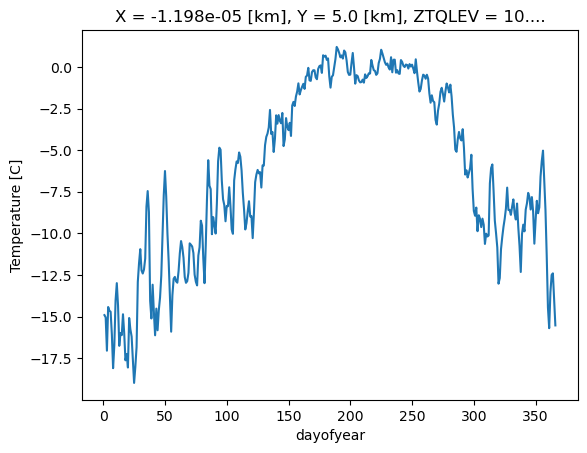

In [22]:
ALL_MAR_Cycle[1].plot()

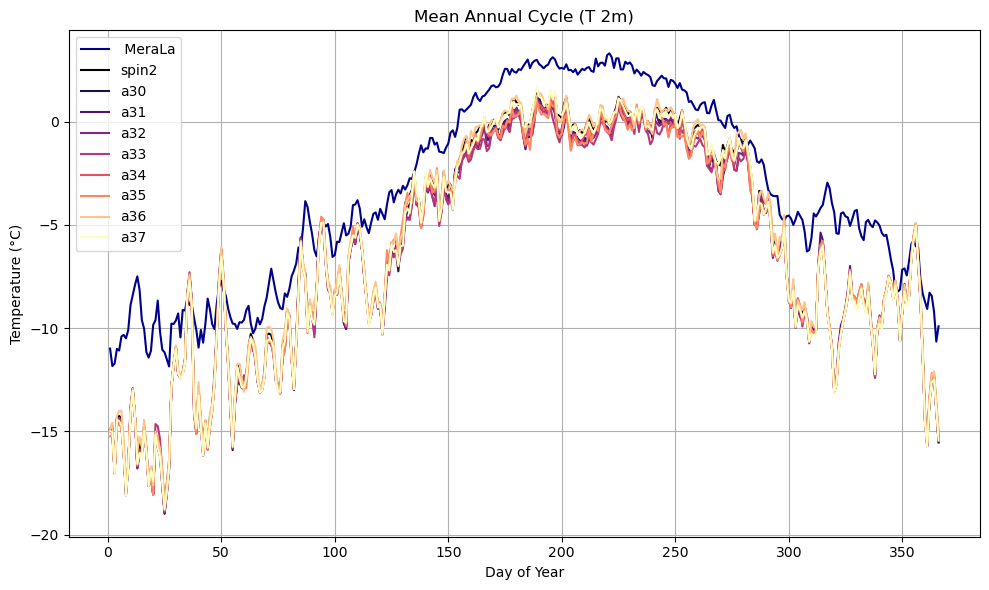

16.678223


In [23]:
plt.figure(figsize=(10, 6))
labels = ['spin2'] + [f'a{i}' for i in range(30, 38)]
colors = cm.magma(np.linspace(0, 1, len(labels)))

plt.plot(T_cycle_sta.dayofyear,T_cycle_sta.Tair,
         color='darkblue',linestyle='-',label=' MeraLa',marker='')    

for i, ds_cycle in enumerate(ALL_MAR_Cycle):
        plt.plot(ds_cycle.dayofyear, ds_cycle.values,
                 linestyle='-', color=colors[i], label=labels[i])

plt.legend()
plt.title('Mean Annual Cycle (T 2m)')
plt.xlabel('Day of Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()
print (diff)

In [24]:
MAR_Month= [ ds.resample(time='ME').mean() for ds in ALL_MAR]

seasonal_T_Sta= seasonal_annual_clim(Clim_Temp_station['monthly'],seasons)

MAR_season=[Model_seasonal_timeseries(ds) for ds in MAR_Month]


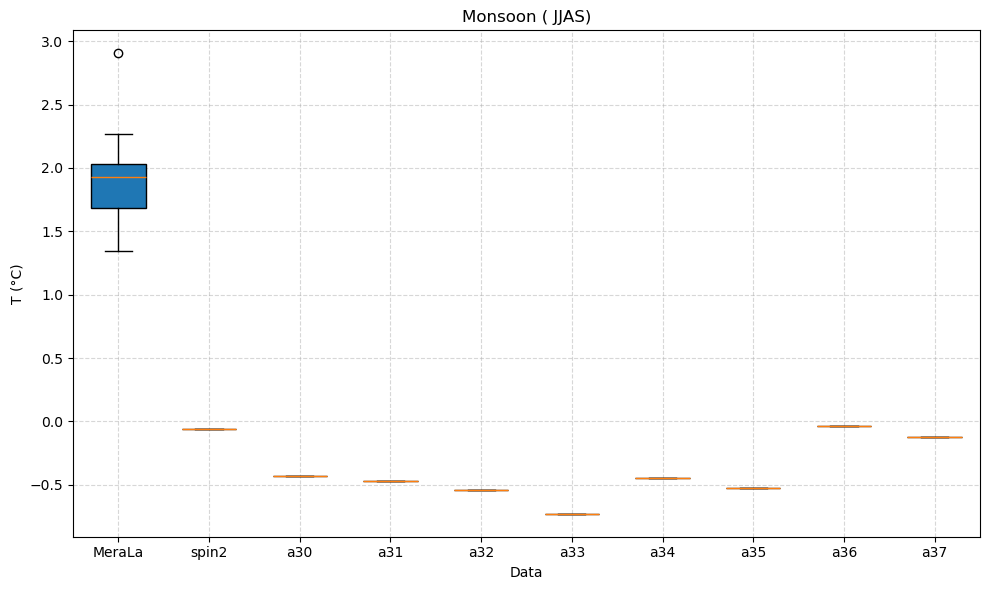

In [25]:




sta_jjas = seasonal_T_Sta['Tair']['JJAS'].values
MAR_jjas = [ds['JJAS'].values.item() for ds in MAR_season]  
boxplot_data = [sta_jjas] + [[val] for val in MAR_jjas]  

labels = [station] + ['spin2']+[f'a{i}' for i in range(30, 38)]

plt.figure(figsize=(10, 6))
colors = cm.CMRmap(np.linspace(0, 1, len(labels)))

box = plt.boxplot(boxplot_data, patch_artist=True, widths=0.6)

# Mise en forme
plt.xticks(ticks=np.arange(1, len(labels) + 1), labels=labels)
plt.title('Monsoon ( JJAS)')
plt.xlabel('Data')
plt.ylabel('T (°C)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
"""
GRa a30: humidity_magic = 5
 a31: a30 + cloud_magic = 0 a32: a31 + cnos x10
 a33: a31 + cnos x100
 a34: a31 + cnos /10
 a35: a31 + cnos /100
a36/37 : corr Humidité [aux frontières] +- 5% ( à partir de a31?)
GRf f30: humidity_magic = 5
 f31: f30 + cloud_magic = 0 f32: f31 + cnos x10
 f33: f31 + cnos x100
 f34: f31 + cnos /10
 f35: f31 + cnos /100
 """